In [1]:
import torch
from model import Model
from plot_utils import plot_forward, plot_dataset, plot_color_distribution
from notebook_utils import Args
from dataset import prepare_data
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
import seaborn as sns

In [2]:
args = Args(timesteps=100, batch=4, unet_version=0, scale_down=True)
device = "cuda:0" if torch.cuda.is_available () else 'cpu'

In [3]:
train_dataloader, dataset = prepare_data (args.dataset_path, args.batch,resize=args.scale_down, return_dataset=True)
model = Model (None, args.timesteps)

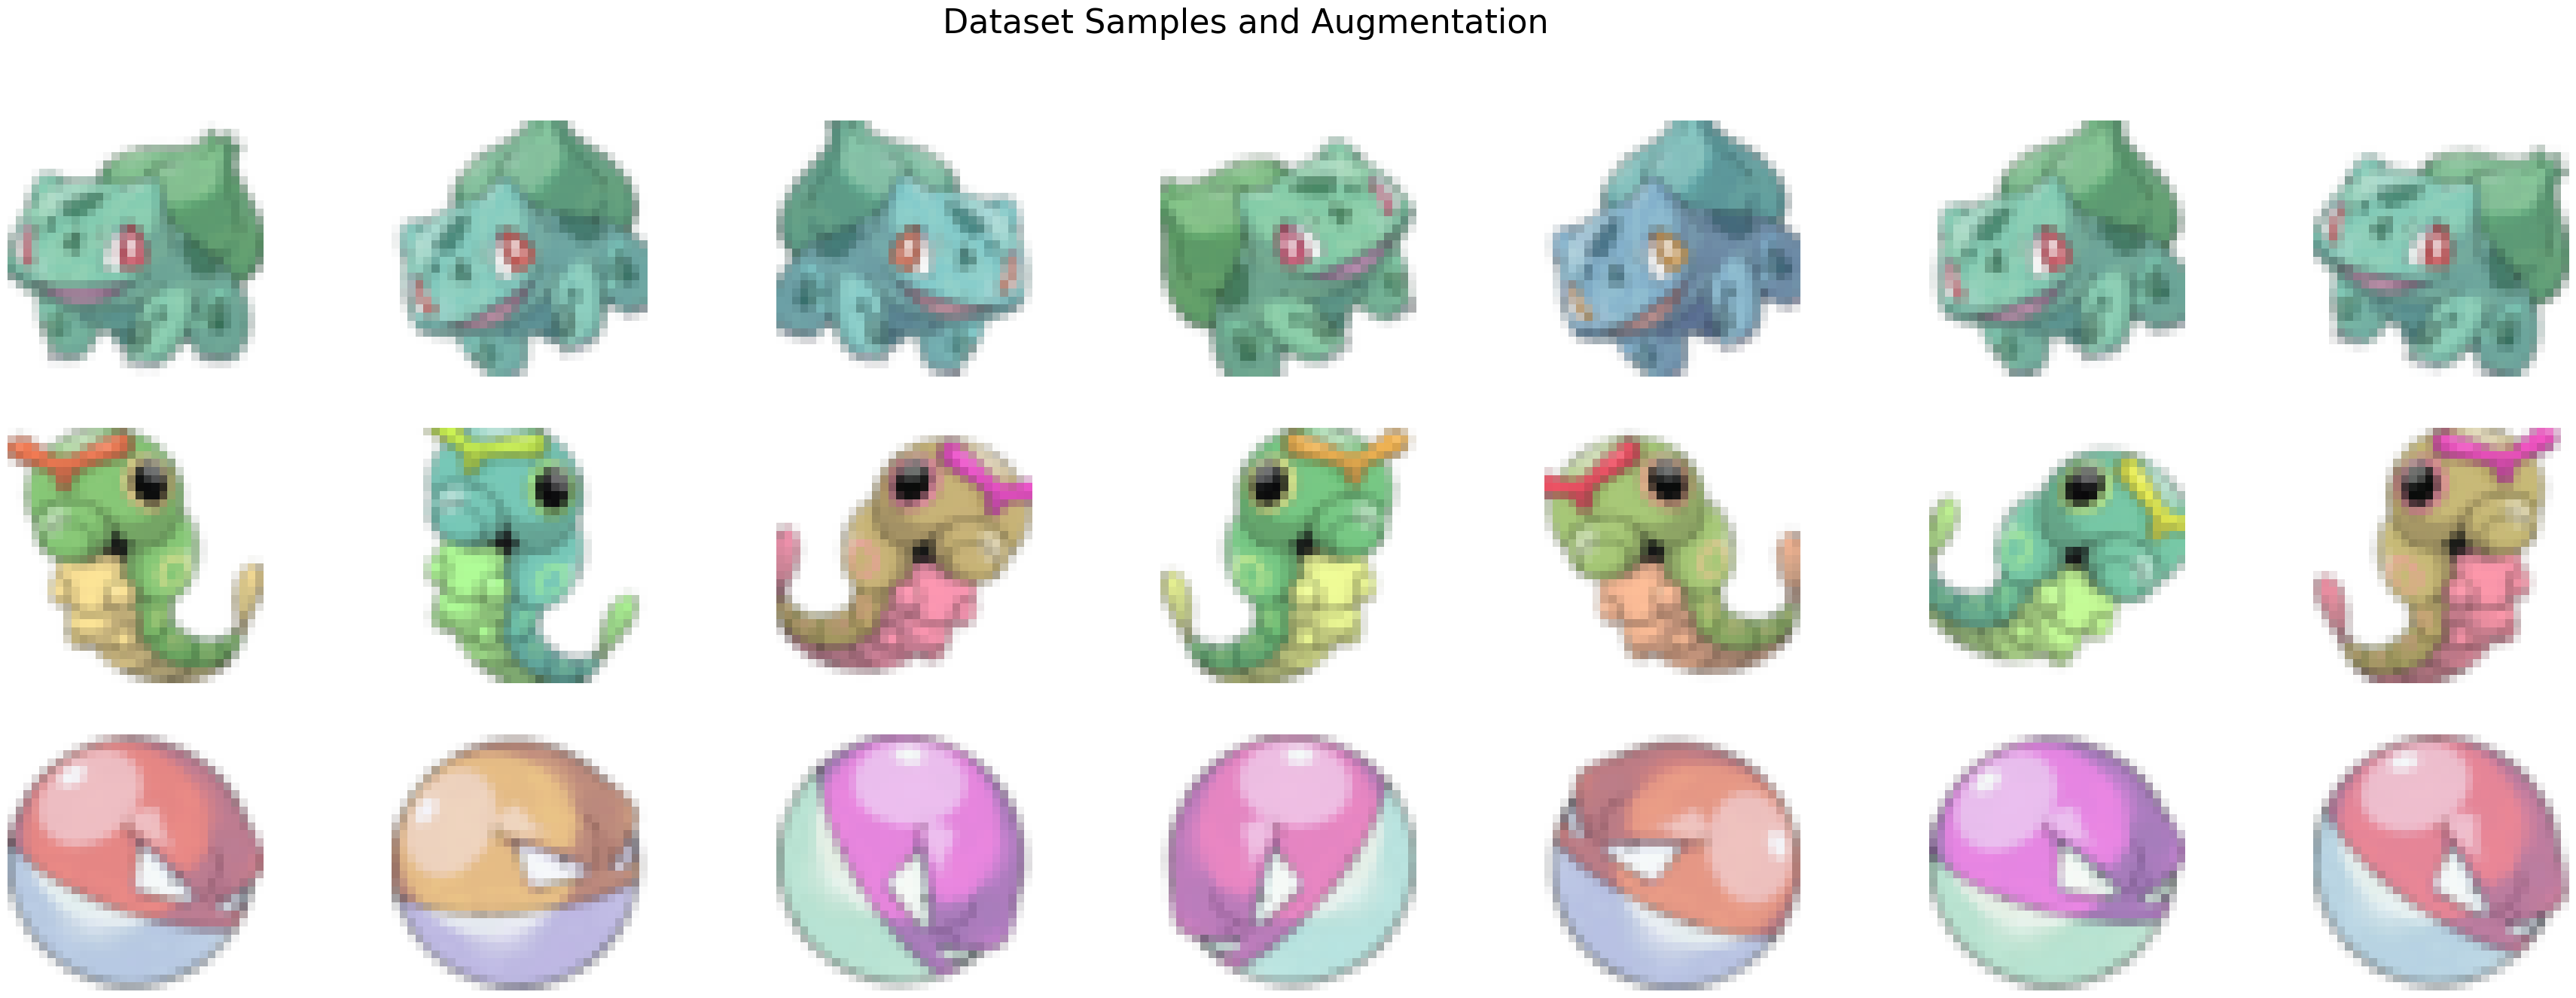

In [4]:
plot_dataset(dataset)

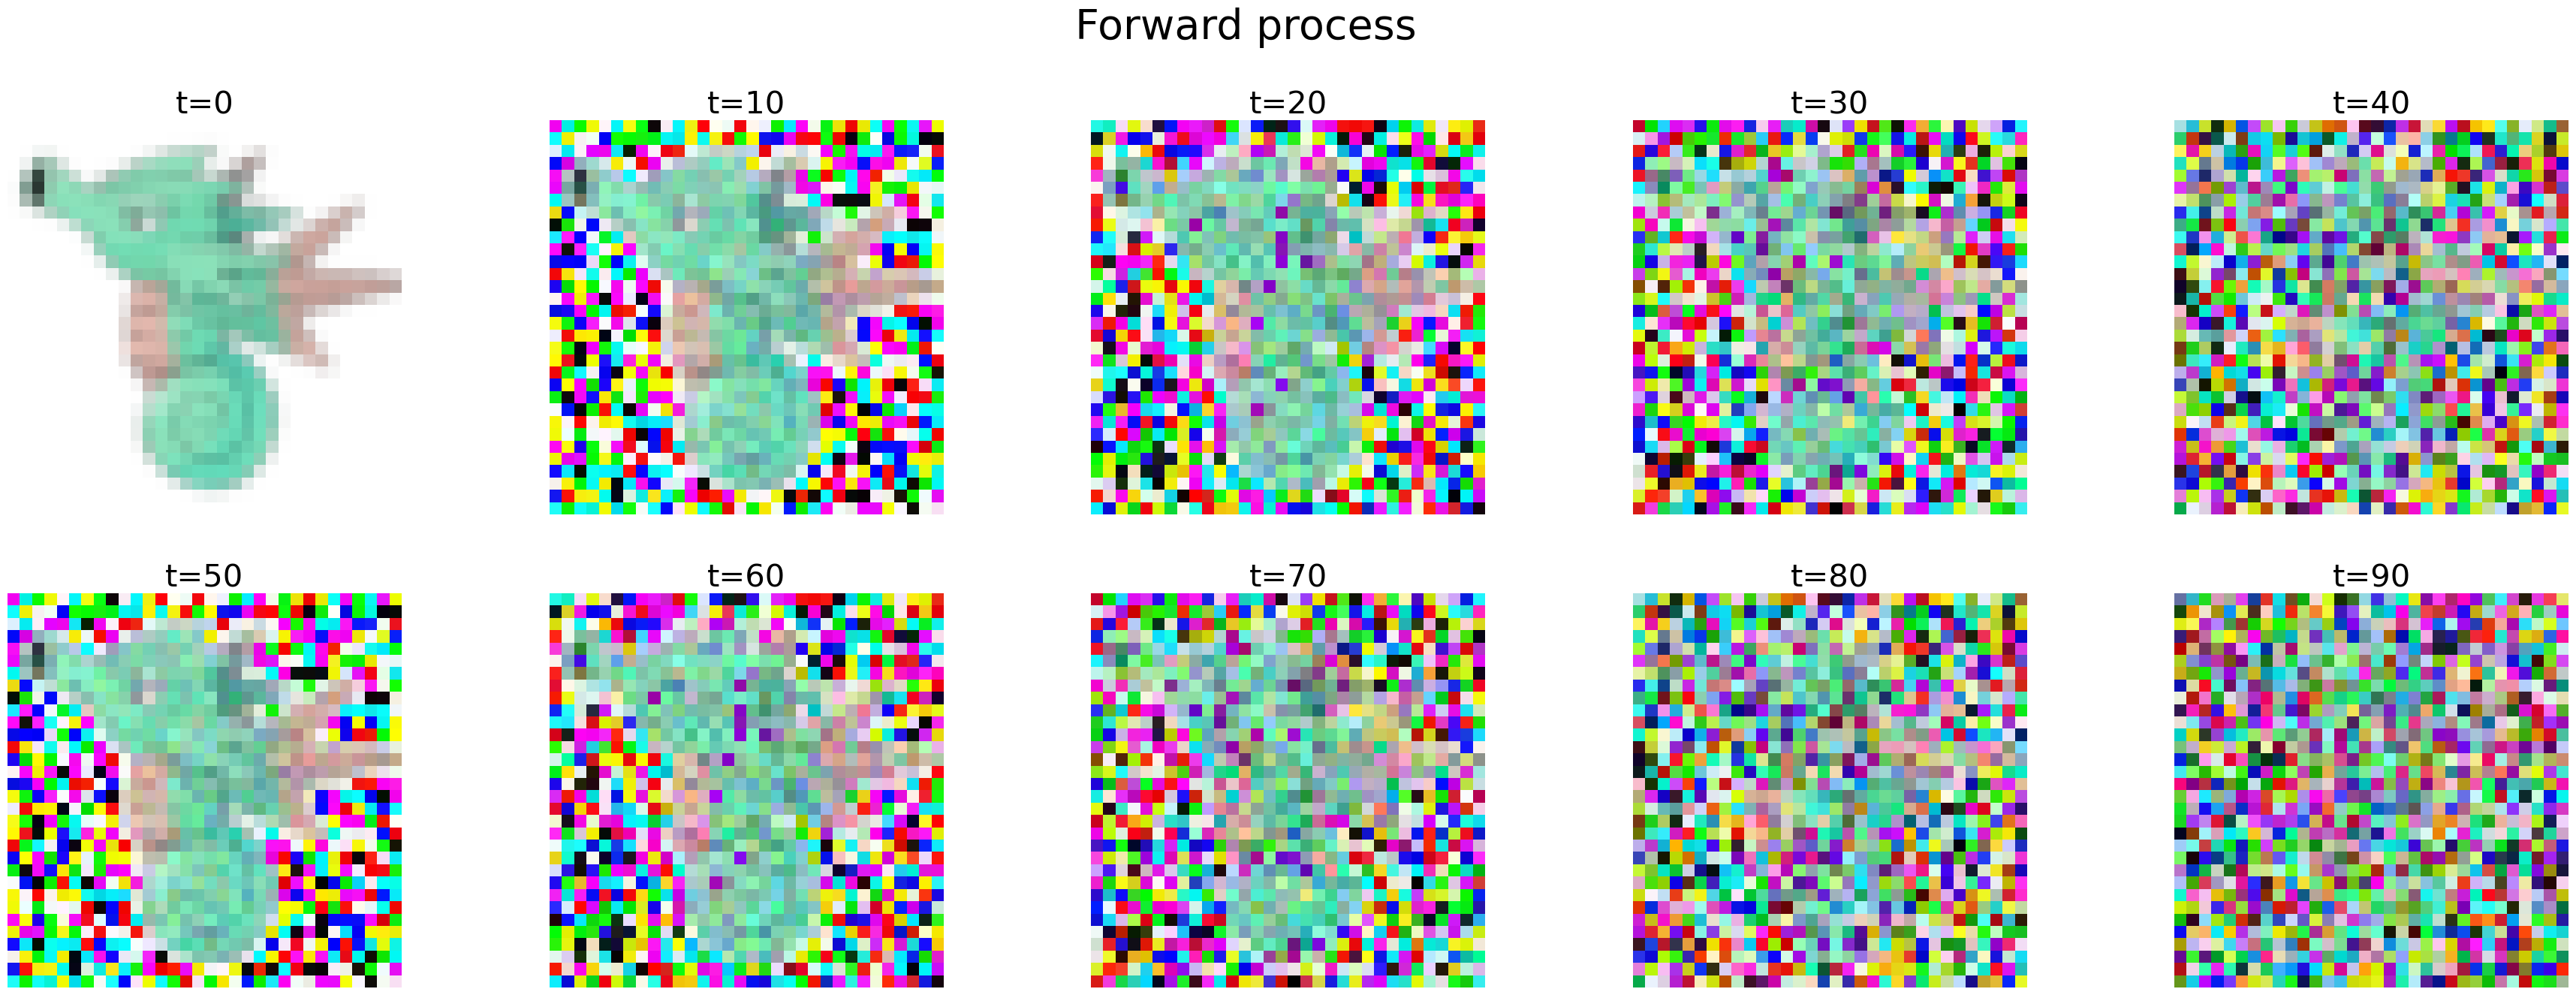

In [5]:

timesteps = torch.linspace (10, 90, 9).long ()
img = next (iter (train_dataloader))
forward = [img]
for t in timesteps:
    forward.append (model.forward_sample (img, t.reshape (1)))
plot_forward(forward)

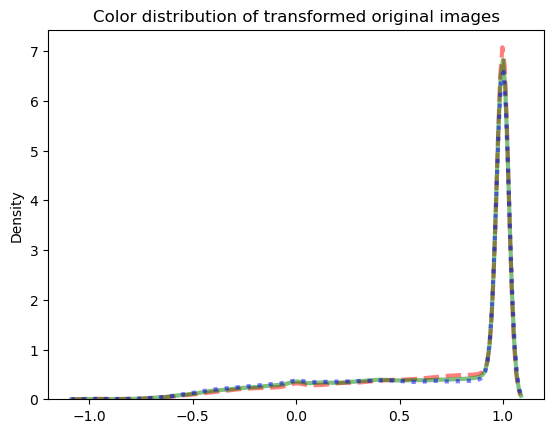

In [6]:
plot_color_distribution(args, model, dataset, train_dataloader,device, forward=False)

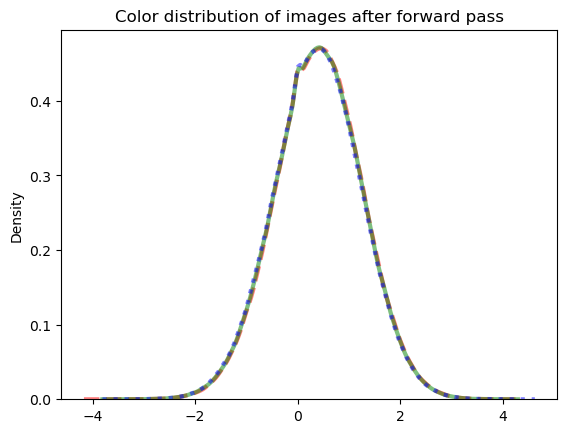

In [7]:
plot_color_distribution(args, model, dataset, train_dataloader,device, forward=True)